In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
bank_data = pd.read_csv("bank-full.csv")

In [3]:
bank_data.shape # Check number of columns and rows in data frame

(45211, 17)

In [4]:
bank_data.head() # Check first 5 rows of data set

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
bank_data.isnull().values.any() # If there are any null values in data set

False

### Perform 5 Point Summary analysis of numerical data

In [5]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Lets start with Exploratory Data Analysis of all Categorical variables

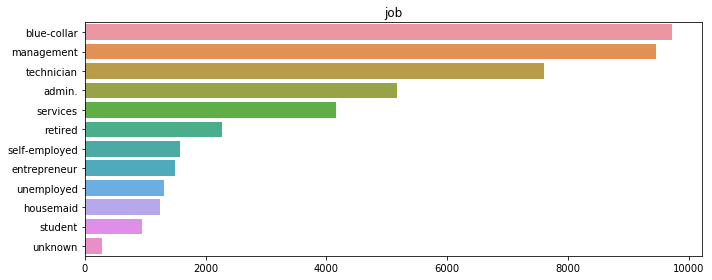

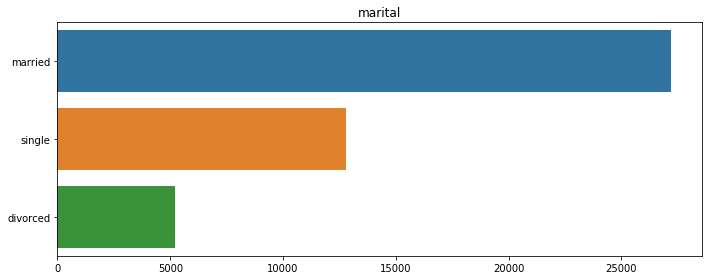

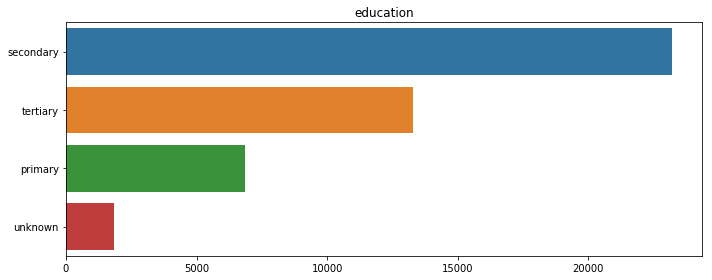

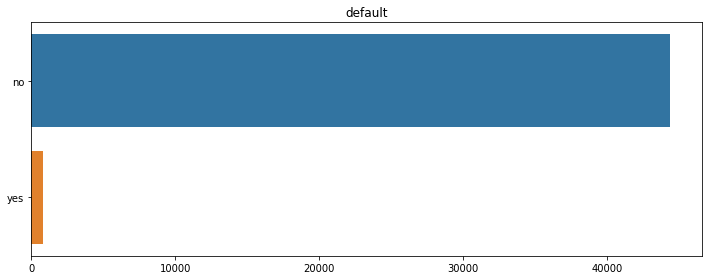

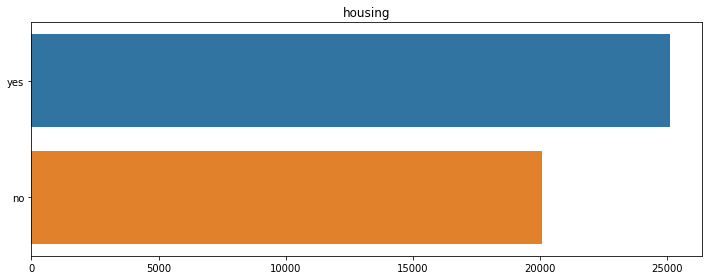

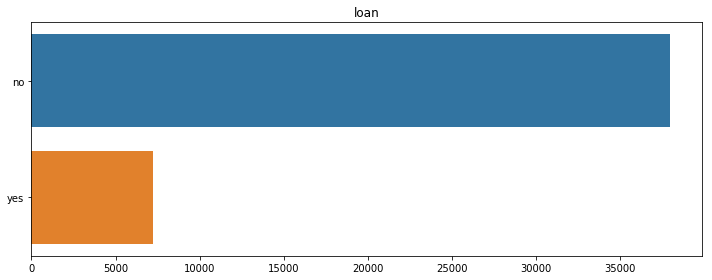

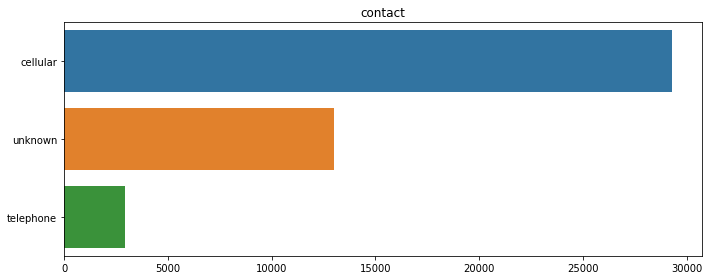

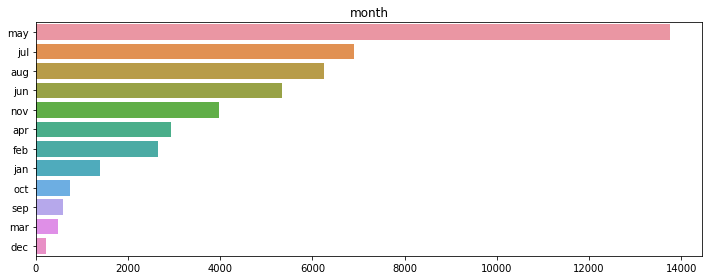

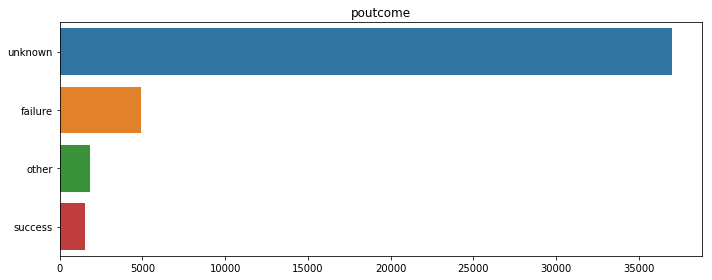

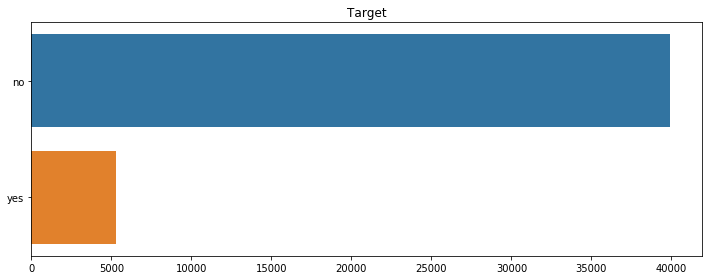

In [7]:
category_elements = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',  'poutcome','Target']
for ele in category_elements:
    plt.figure(figsize=(10,4))
    sns.barplot(bank_data[ele].value_counts().values, bank_data[ele].value_counts().index)
    plt.title(ele)
    plt.tight_layout()

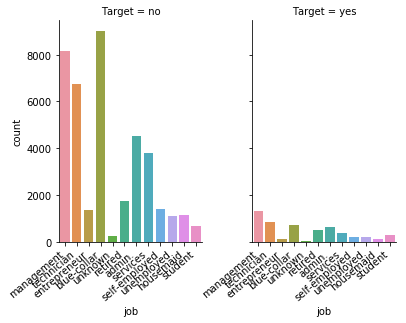

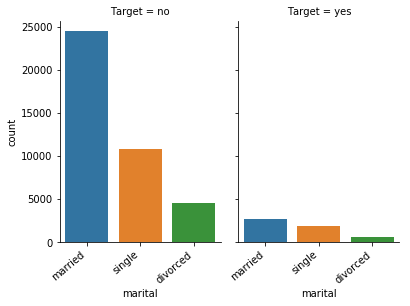

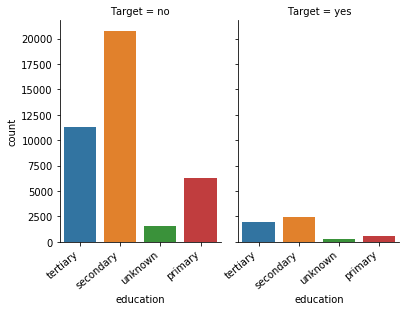

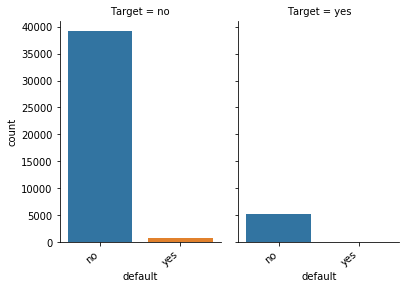

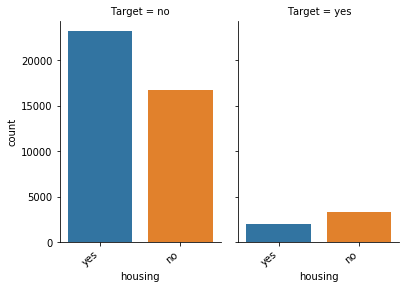

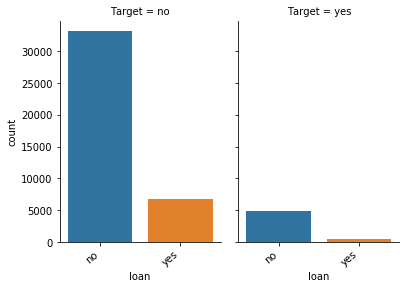

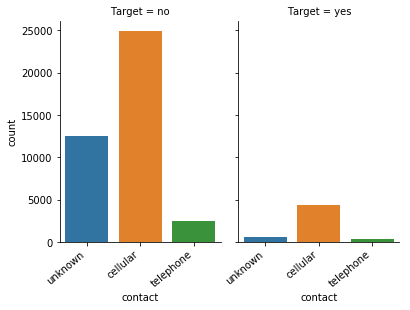

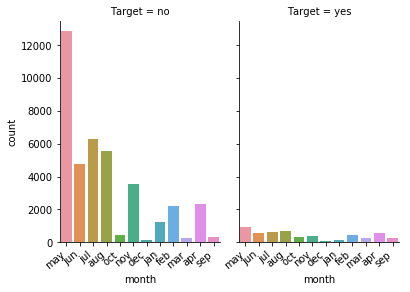

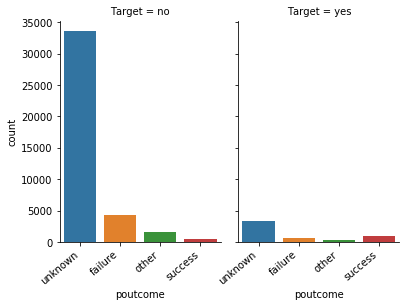

In [8]:
category_elements = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',  'poutcome']
for ele in category_elements:
    g = sns.catplot(x=ele,  col="Target",
           data=bank_data, kind="count",
                 height=4, aspect=.7);
    g.set_xticklabels(rotation=40, ha="right")



###  Dealing with Categorical Data

In [9]:
bank_data['job'][bank_data['age']>60].value_counts()

retired          875
management       105
housemaid         56
technician        30
blue-collar       26
admin.            25
self-employed     24
unknown           22
entrepreneur      13
unemployed        10
services           2
Name: job, dtype: int64

#### The Unknown Categorical Data for Job can be filled as 'Retired' as age > 60

In [4]:
bank_data.loc[(bank_data['age']>60) & (bank_data['job']=='unknown'), 'job'] = 'retired'
bank_data['job'][bank_data['age']>60].value_counts().head(1)

retired    897
Name: job, dtype: int64

In [12]:
bank_data['job'][bank_data['education']=='unknown'].value_counts()

blue-collar      454
technician       242
management       242
admin.           171
student          163
services         150
retired          130
unknown          116
entrepreneur      76
housemaid         45
self-employed     39
unemployed        29
Name: job, dtype: int64

### Imputing data of Education based on jobs generic assumption

In [5]:

job_category1 = ['management', 'services', 'entrepreneur', 'retired', 'self-employed', 'student']
for ele in job_category1:
    bank_data.loc[(bank_data['education']=='unknown') & (bank_data['job']==ele), 'education'] = 'tertiary'

job_category2 = ['admin.', 'technician']
for ele in job_category2:
    bank_data.loc[(bank_data['education']=='unknown') & (bank_data['job']==ele), 'education'] = 'secondary'

job_category3 = ['housemaid', 'unemployed', 'unknown','blue-collar']
for ele in job_category3:
    bank_data.loc[(bank_data['education']=='unknown') & (bank_data['job']==ele), 'education'] = 'primary'


In [14]:
bank_data['job'][bank_data['education']=='unknown'].value_counts()

Series([], Name: job, dtype: int64)

In [15]:
bank_data['education'][bank_data['job']=='unknown'].value_counts()

primary      166
secondary     66
tertiary      34
Name: education, dtype: int64

### Imputing data of Jobs based on Education generic assumption

In [6]:
bank_data.loc[(bank_data['job'] == 'unknown') & (bank_data['education']=='primary'), 'job'] = 'blue-collar'
bank_data.loc[(bank_data['job'] == 'unknown') & (bank_data['education']=='secondary'), 'job'] = 'technician'
bank_data.loc[(bank_data['job'] == 'unknown') & (bank_data['education']=='tertiary'), 'job'] = 'services'

### Some Unknowns are eliminated

## Lets deal with missing values in Numerical data

In [17]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### As can be seen that pdays has -1 as majority data. It seems that it is incorrect

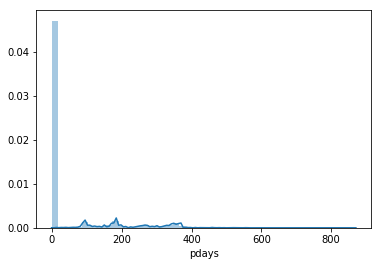

In [18]:
sns.distplot(bank_data['pdays'])

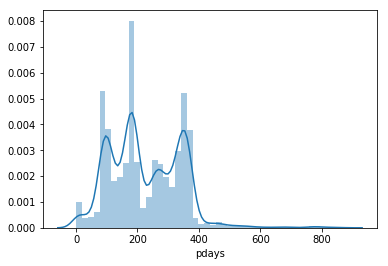

In [19]:
sns.distplot(bank_data.loc[bank_data.pdays != -1, 'pdays'])

In [10]:
bank_data.groupby('poutcome')['pdays'].apply(lambda x: x.value_counts().head(1))

poutcome      
failure    370       80
other      2         35
success    92        94
unknown   -1      36954
Name: pdays, dtype: int64

### As we can see from the above table, the majority of the values for 'pdays' are Incorrect or Missing. The majority of these missing values occur when the 'poutcome' is 'unknown'. This means that the majority of the values in 'pdays' are missing because the customer was never contacted before.

#### Convert pdays into a categorical variable 

In [7]:
#Add new categorical variables to our dataframe.
bank_data['pdays_missing'] = 0
bank_data['pdays_less_150'] = 0
bank_data['pdays_greater_350'] = 0
bank_data['pdays_bet_150_350'] = 0
bank_data['pdays_missing'][bank_data['pdays']==-1] = 1
bank_data['pdays_less_150'][bank_data['pdays']<150] = 1
bank_data['pdays_greater_350'][bank_data['pdays']>350] = 1
bank_data['pdays_bet_150_350'][(bank_data['pdays']>=150)&(bank_data['pdays']<=350)]= 1
bank_data_dropped_pdays = bank_data.drop('pdays', axis=1);

e:\ANACONDA\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
e:\ANACONDA\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
e:\ANACONDA\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
e:\ANACONDA\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

In [8]:
bank_data_with_dummies=pd.get_dummies(bank_data_dropped_pdays)

In [9]:

features_to_be_dropped = ['pdays_less_150','job_unemployed','marital_single','default_no','loan_no','housing_no','Target_no']

bank_data_clean = bank_data_with_dummies.drop(features_to_be_dropped, axis=1)

#### Drop one of the dummy variables as for $n$ categories we only need $n$-1 dummy variables

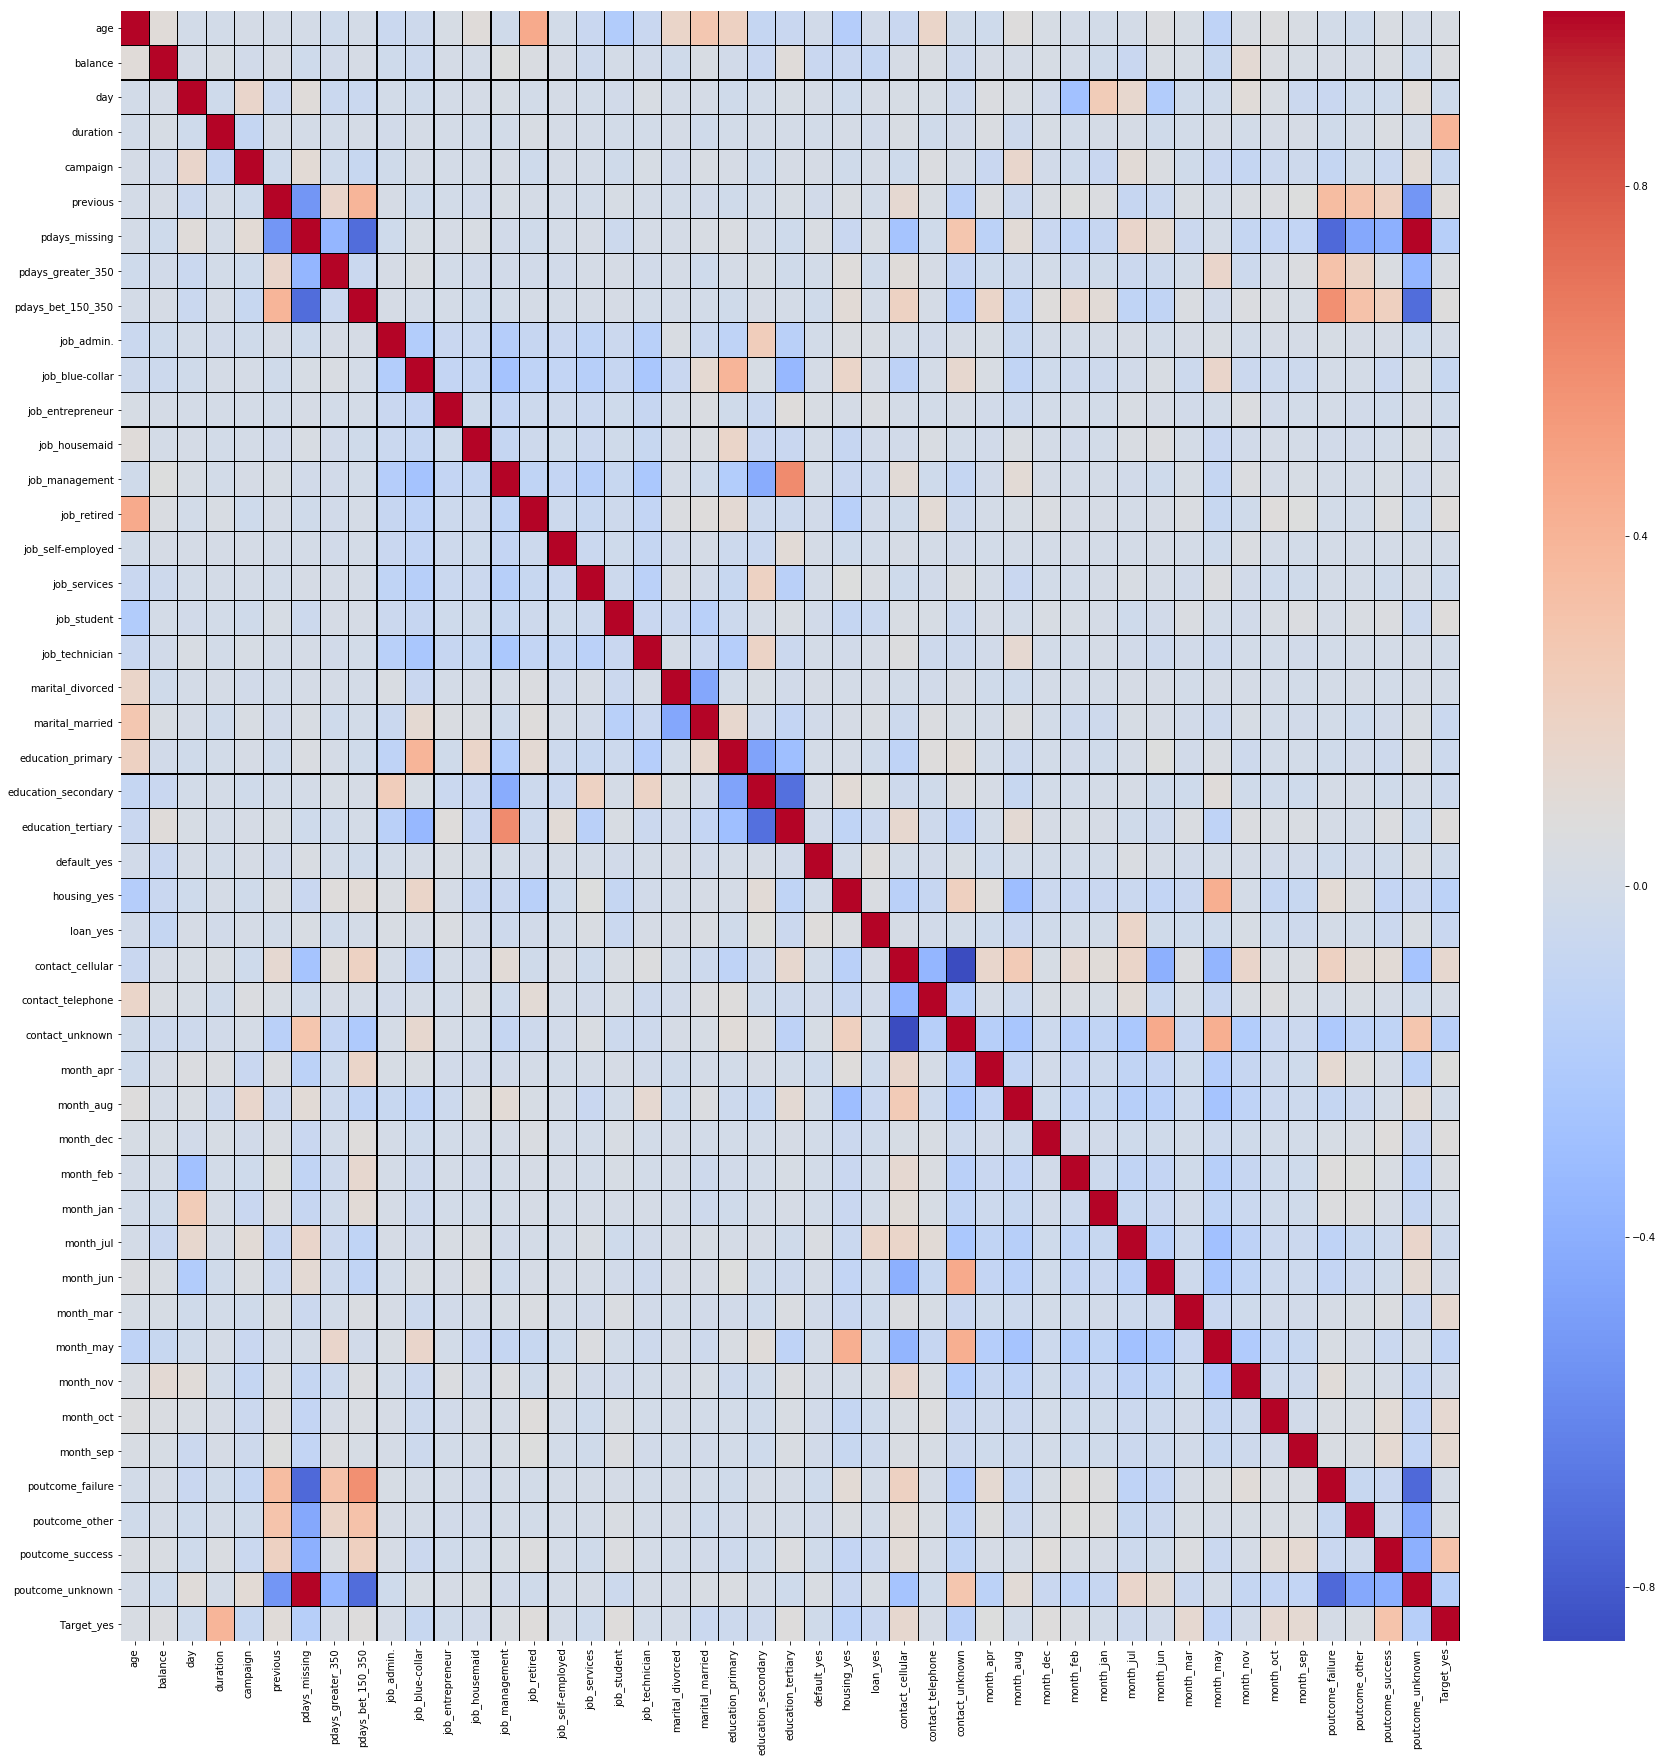

In [26]:
plt.figure(figsize=(30, 30))
sns.heatmap(bank_data_clean.corr(), annot=False, linecolor='black', linewidths=0.05, cmap="coolwarm")

#### From the above heat map we can see that 'Target_yes' (our target variable) has good correlation with 'previous',  'job_retired', 'contact_cellular', 'poutcome_success' and 'duration'. We expect to see these independent variables as significant while building the models.

In [25]:
n_true = len(bank_data_clean.loc[bank_data_clean['Target_yes']==1])
n_false = len(bank_data_clean.loc[bank_data_clean['Target_yes']==0])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 5289 (11.70%)
Number of false cases: 39922 (88.30%)


In [10]:
from sklearn.model_selection import train_test_split

X = bank_data_clean.drop(['Target_yes'],axis=1)     

Y = bank_data_clean['Target_yes'] 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [27]:
print("Original Target True Values    : {0} ({1:0.2f}%)".format(len(bank_data_clean.loc[bank_data_clean['Target_yes'] == 1]), (len(bank_data_clean.loc[bank_data_clean['Target_yes'] == 1])/len(bank_data_clean.index)) * 100))
print("Original Target False Values   : {0} ({1:0.2f}%)".format(len(bank_data_clean.loc[bank_data_clean['Target_yes'] == 0]), (len(bank_data_clean.loc[bank_data_clean['Target_yes'] == 0])/len(bank_data_clean.index)) * 100))
print("")
print("Training Target True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Target False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Target True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Target False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Target True Values    : 5289 (11.70%)
Original Target False Values   : 39922 (88.30%)

Training Target True Values    : 3738 (11.81%)
Training Target False Values   : 27909 (88.19%)

Test Target True Values        : 1551 (11.43%)
Test Target False Values       : 12013 (88.57%)



### Scale the data points using MinMaxScaler

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

e:\ANACONDA\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
e:\ANACONDA\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Logistic Regression

In [29]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train_scaled, y_train)
#predict on test
y_predict = model.predict(X_test_scaled)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1        2          3         4         5         6  \
0 -0.120142  1.330584  0.17703  18.552192 -3.528934  0.772644 -0.701165   

          7         8         9  ...        37        38        39        40  \
0  0.143581 -0.355992  0.201317  ...  1.272434 -0.513323 -0.928094  0.824195   

         41        42        43       44        45  intercept  
0  0.711985 -0.960478 -0.844844  1.23178 -0.491855  -1.065397  

[1 rows x 47 columns]


In [30]:
model_score = model.score(X_test_scaled, y_test)
print(model_score)

0.9023886759068122


          Predict 1  Predict 0
Actual 1        722        829
Actual 0        495      11518


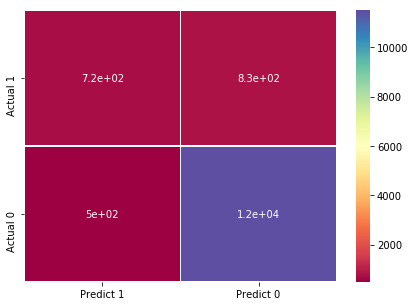

In [31]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print(df_cm)
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap="Spectral", linecolor='white', linewidths=0.5)

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     12013
           1       0.59      0.47      0.52      1551

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.76      0.71      0.73     13564
weighted avg       0.89      0.90      0.90     13564



### KNN Model

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# instantiate learning model (k = 1)
knn = KNeighborsClassifier(n_neighbors = 1)

# fitting the model
knn.fit(X_train_scaled, y_train)

# predict the response
y_pred = knn.predict(X_test_scaled)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))


# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors = 5)

# fitting the model
knn.fit(X_train_scaled, y_train)

# predict the response
y_pred = knn.predict(X_test_scaled)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors=9)

# fitting the model
knn.fit(X_train_scaled, y_train)

# predict the response
y_pred = knn.predict(X_test_scaled)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 11)
knn = KNeighborsClassifier(n_neighbors=11)

# fitting the model
knn.fit(X_train_scaled, y_train)

# predict the response
y_pred = knn.predict(X_test_scaled)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))




0.8645679740489531
0.8908139191978768
0.8941315246240047
0.893394278973754


In [34]:
# creating odd list of K for KNN

neighbors = list(range(1,20, 2))

In [35]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    # predict the response
    y_pred = knn.predict(X_test_scaled)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 15


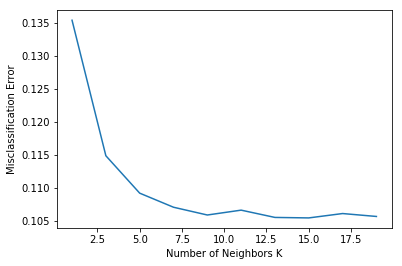

In [36]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

0.8945738720141552
   Predict 1  Predict 0
1        323       1228
0        202      11811


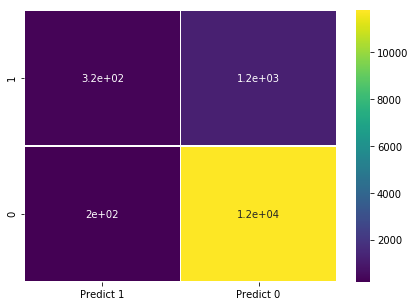

In [37]:
# instantiate learning model (k = 15)
knn = KNeighborsClassifier(n_neighbors=15)

# fitting the model
knn.fit(X_train_scaled, y_train)

# predict the response
y_pred = knn.predict(X_test_scaled)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print(df_cm)
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap="viridis", linecolor='white', linewidths=0.5)

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.62      0.21      0.31      1551

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.76      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564



### Train Naive Bayes algorithm

In [39]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
pl_model = GaussianNB()

pl_model.fit(X_train_scaled, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

### Performance of our model with training data

In [40]:
pl_train_predict = pl_model.predict(X_train_scaled)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, pl_train_predict)))
print()

Model Accuracy: 0.8357



### Performance of our model with test data

In [41]:
pl_test_predict = pl_model.predict(X_test_scaled)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, pl_test_predict)))
print()

Model Accuracy: 0.8221



Confusion Matrix
   Predict 1  Predict 0
1        913        638
0       1775      10238


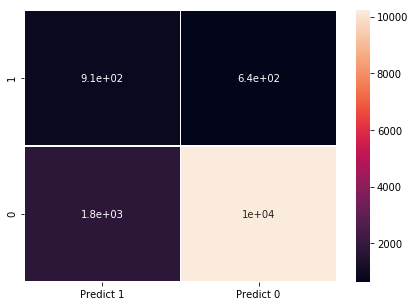

In [42]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, pl_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print(df_cm)
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, linecolor='white', linewidths=0.5)

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.62      0.21      0.31      1551

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.76      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564



### Trying with SVM

In [44]:
from sklearn import svm
from sklearn.svm import SVC

In [45]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

e:\ANACONDA\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on training set: 0.89
Accuracy on test set: 0.90


In [46]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

e:\ANACONDA\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on training set: 0.925
Accuracy on test set: 0.904


In [47]:
y_pred = svc.predict(X_test_scaled)

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9041580654674137


Confusion Matrix
   Predict 1  Predict 0
1        820        731
0        569      11444


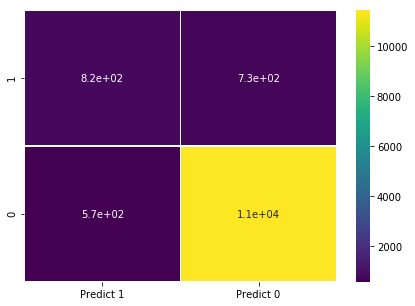

In [49]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print(df_cm)
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap='viridis', linecolor='white', linewidths=0.5)

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     12013
           1       0.59      0.53      0.56      1551

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.77      0.74      0.75     13564
weighted avg       0.90      0.90      0.90     13564



### SVM's are good Model; better than Bayes and KNN and Logistic Regression

### Decision Trees and Random Forest

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

### DecisionTreeClassifier

In [53]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(bank_data_clean, test_size=0.3 , random_state=53)

In [54]:
train_labels = train_set.pop("Target_yes")
test_labels = test_set.pop("Target_yes")

In [55]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 3)
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [56]:
dt_model.score(test_set , test_labels)

0.9012828074314362

### RandomForestClassifier

In [57]:
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(train_set, train_labels)

e:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

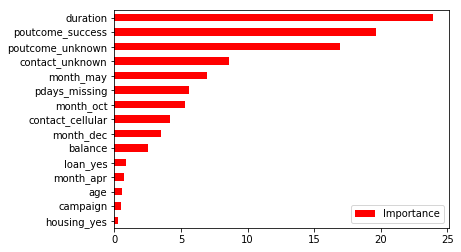

In [69]:

Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=train_set.columns)
Importance.sort_values('Importance', axis=0, ascending=True).tail(15).plot(kind='barh', color='r', )

In [62]:
predicted_random=randomforest_model.predict(test_set)

In [63]:
randomforest_model.score(test_set,test_labels)

0.8838838100855205

#### Apply Adaboost Ensemble Algorithm for the same data and print the accuracy

In [25]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(train_set, train_labels)

test_pred = abcl.predict(test_set)
abcl.score(test_set , test_labels)

NameError: name 'train_set' is not defined

#### Apply Bagging Classifier Algorithm and print the accuracy

In [65]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(train_set, train_labels)

In [66]:
test_pred = bgcl.predict(test_set)
bgcl.score(test_set , test_labels)

0.9006192863462106

#### Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(train_set, train_labels)


In [68]:
test_pred = gbcl.predict(test_set)
gbcl.score(test_set , test_labels)

0.9003981126511353

## Recommendations: Engage deeply with Customers with longer duration of telephone calls. Priortize Customers who were part of previous campaigns. Also customers with higher Balance in account

### SVM's and Greadient Boost work best to make predictions in this problem, better than other Models

In [26]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier



In [29]:
from sklearn.model_selection import train_test_split, KFold

X = bank_data_clean.drop(['Target_yes'],axis=1)     

y = bank_data_clean['Target_yes'] 
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

e:\ANACONDA\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
e:\ANACONDA\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [30]:
# Prepare cross-validation (cv)
cv = KFold(n_splits = 5, random_state = None)


In [31]:
# prepare configuration for cross validation test harness
seed = 7


In [32]:
# Classifiers
names = [
    "Logistic Regression","Linear SVM", "Neural Net", "Linear Discriminant Analysis","Decision Trees","Guassian NB",
"KNN","Random Forest","AdaBoost","Bagging","GradientBoosting"]

classifiers = [
    LogisticRegression(),
    SVC(C=1000),
    MLPClassifier(alpha=1),
    LinearDiscriminantAnalysis(),
    DecisionTreeClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    RandomForestClassifier(max_depth=2, random_state=0),
    AdaBoostClassifier( n_estimators= 20),
    BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True),
    GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05),
]

In [33]:
# iterate over classifiers
models = []
trained_classifiers = []
scoring="accuracy"
for name, clf in zip(names, classifiers):
    scores = []
    for train_indices, test_indices in cv.split(X):
        clf.fit(X[train_indices], y[train_indices].ravel())
        scores.append( clf.score(X_test, y_test.ravel()) )
           
    min_score = min(scores)
    max_score = max(scores)
    avg_score = sum(scores) / len(scores)
    
    trained_classifiers.append(clf)
    from sklearn.metrics import classification_report
    models.append((name, min_score, max_score, avg_score))
    
fin_models = pd.DataFrame(models, columns = ['Name', 'Min Score', 'Max Score', 'Mean Score'])

e:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\ANACONDA\lib\site-packages\sklea

In [35]:
fin_models.sort_values(['Mean Score']).head(10)

,Name,Min Score,Max Score,Mean Score
5,Guassian NB,0.709746,0.878207,0.804940
7,Random Forest,0.885653,0.885653,0.885653
3,Linear Discriminant Analysis,0.871351,0.901946,0.893217
8,AdaBoost,0.883220,0.900324,0.893792
0,Logistic Regression,0.892141,0.901578,0.897552
10,GradientBoosting,0.895606,0.905633,0.900988
6,KNN,0.887054,0.918608,0.902477
2,Neural Net,0.894279,0.910867,0.902772
1,Linear SVM,0.931879,0.946623,0.938396
4,Decision Trees,0.932395,0.967782,0.949926
